In [25]:

!git clone https://github.com/edgi-govdata-archiving/ECHO_modules.git &>/dev/null
import pandas
import folium
import ipywidgets as widgets
import pdb
import os
import urllib.parse
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

This cell allows the user to make selections regarding programs, active facilities, and NAICS codes. make_selections() displays a widget, allowing the user to choose multiple programs from a list, decide if they want to filter by active facilities, and input specific NAICS codes separated by commas. Returns the selections made in the widget.

In [26]:
from backend_scripts.programs_facilities_codes import make_selections
slct = make_selections()


SelectMultiple(description='Programs', options=('NPDES_FLAG', 'AIR_FLAG', 'RCRA_FLAG'), value=())

Checkbox(value=False, description='Only active facilities?')

Text(value='', description='NAICS codes', placeholder='Enter NAICS codes here, separated with a comma')

This cell generates an SQL query based on the selections made by the user in the previous cell. query(slct) takes in the arg slct which contains the selections from the previous cell. Returns the SQL query string.

In [27]:
from backend_scripts.query_and_filter import query
squery = query(slct)

In [28]:
# Access the ECHO_EXPORTER table
# Output will be the matching tracked by EPA
from ECHO_modules.get_data import get_echo_data

sql = 'select "FAC_NAME", "CWA_NAICS", "CAA_NAICS", "RCRA_NAICS", "FAC_NAICS_CODES", "FAC_LAT", "FAC_LONG", "FAC_INSPECTION_COUNT", "FAC_DAYS_LAST_INSPECTION" ,"FAC_INFORMAL_COUNT" ,"FAC_FORMAL_ACTION_COUNT", "FAC_PERCENT_MINORITY", "FAC_TOTAL_PENALTIES", "FAC_PENALTY_COUNT", "FAC_QTRS_WITH_NC","EJSCREEN_FLAG_US" from "ECHO_EXPORTER" where ' + squery
try:
  echo = get_echo_data( sql )
except pandas.errors.EmptyDataError:
  print("\nThere are no records.\n")
  
echo

,FAC_NAME,CWA_NAICS,CAA_NAICS,RCRA_NAICS,FAC_NAICS_CODES,FAC_LAT,FAC_LONG,FAC_INSPECTION_COUNT,FAC_DAYS_LAST_INSPECTION,FAC_INFORMAL_COUNT,FAC_FORMAL_ACTION_COUNT,FAC_PERCENT_MINORITY,FAC_TOTAL_PENALTIES,FAC_PENALTY_COUNT,FAC_QTRS_WITH_NC,EJSCREEN_FLAG_US
0,ST. REGIS GAS TREATING FACILITY,211111 211112,NaN,NaN,211120 211112 211111,30.948450,-87.178170,1,1048.0,0,0,5.296,0,NaN,0,N
1,"FIELDWOOD ENERGY, LLC VK 340 A",211120,NaN,NaN,211120,29.636389,-88.092222,0,NaN,0,0,0.000,0,NaN,2,NaN
2,BRUCE PLATFORM,NaN,211111 211120,NaN,211120 211111,60.998013,-151.299784,3,563.0,1,0,0.000,0,NaN,1,N
3,TERRACORE OPERATING CO LLC,NaN,NaN,211120,211120,34.832050,-120.312449,0,NaN,0,0,37.657,0,NaN,0,N
4,ENERGEN RESOURCES CORP - BRUSH CREEK,211120,NaN,NaN,211120,33.286100,-87.390600,1,114.0,0,0,6.667,0,NaN,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,MURPHY EXPLORATION & PRODUCTION COMPANY â USA,211120,NaN,NaN,211120,29.783880,-95.535430,0,8789.0,1,1,51.572,0,NaN,0,N
105,ENLINK PROCESSING SERVICES LLC - PLAQUMINE NGL...,NaN,211120 211112,211120,211120 211112 21111,30.239570,-91.242360,3,772.0,3,1,55.387,3850,1.0,1,N
106,DELHI NGL PLANT,NaN,211111 211120,21111,211120 21111 211130 21113 211111,32.441732,-91.588175,0,NaN,0,1,21.222,1200,1.0,0,Y
107,BADAMI DEVELOPMENT FACILITY,NaN,211120 211111,48611 211111,211120 211111 48611 48811,70.150997,-147.097369,12,696.0,2,0,0.000,0,NaN,12,N


This cell outputs the mean and medians of different selected fields from the echo table such as FAC_PERCENT_MINORITY, FAC_TOTAL_PENALTIES, etc.

In [29]:
from backend_scripts.mean_median import metrics
metrics(echo)

FAC_PERCENT_MINORITY:
Mean 21.408817307692313
Median 12.397
FAC_TOTAL_PENALTIES
Mean 9938.183486238531
Median 0.0
FAC_PENALTY_COUNT
Mean 1.1875
Median 1.0
FAC_QTRS_WITH_NC
Mean 1.4220183486238531
Median 0.0
FAC_INSPECTION_COUNT
Mean 1.8990825688073394
Median 0.0
FAC_DAYS_LAST_INSPECTION
Mean 2418.0142857142855
Median 1043.5
FAC_INFORMAL_COUNT
Mean 0.7981651376146789
Median 0.0
FAC_FORMAL_ACTION_COUNT
Mean 0.3119266055045872
Median 0.0


This cell generates box plots of different fields.

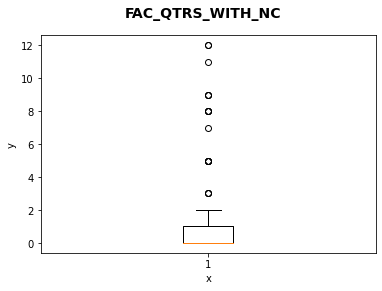

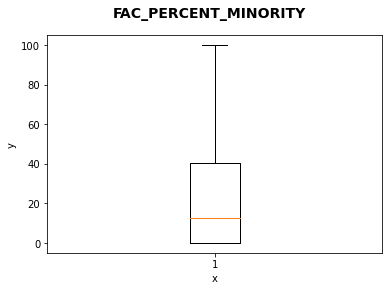

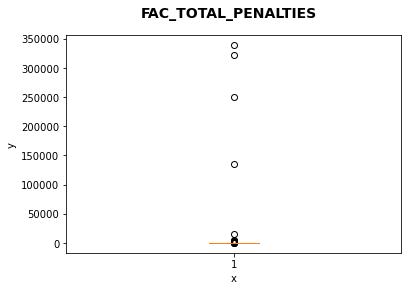

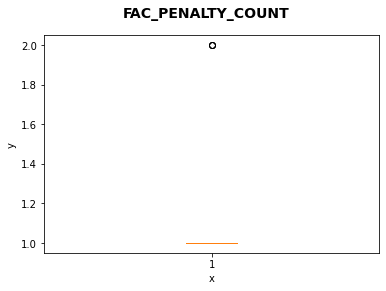

In [30]:
from backend_scripts.graphics import plot_visual_data_box_plot
plot_visual_data_box_plot(echo.FAC_QTRS_WITH_NC, "FAC_QTRS_WITH_NC", "x", "y")
plot_visual_data_box_plot(echo.FAC_PERCENT_MINORITY, "FAC_PERCENT_MINORITY", "x", "y" )
plot_visual_data_box_plot(echo.FAC_TOTAL_PENALTIES, "FAC_TOTAL_PENALTIES", "x", "y" )
plot_visual_data_box_plot(echo.FAC_PENALTY_COUNT, "FAC_PENALTY_COUNT", "x", "y" )

In [31]:
# Export the data to the "Files" side panel for download
echo.to_csv("data.csv")

Mapping the facilities, displaying the name and inspection count of each.

In [32]:
# Map the facilities
from folium.plugins import MarkerCluster
import math

map = folium.Map()
marker_cluster = MarkerCluster().add_to(map)

for index, row in echo.iterrows():
  if math.isnan(row["FAC_LAT"]) or math.isnan(row["FAC_LONG"]): #ignore facilities with no spatial data
    pass
  else:
    marker = folium.Marker(
        location = [float(row["FAC_LAT"]), float(row["FAC_LONG"])],
        popup = row["FAC_NAME"] + ", Inspection count: " + str(row["FAC_INSPECTION_COUNT"])
    ).add_to(marker_cluster)

map
